In [2]:
import xarray
import pandas
import mhw_analysis
import datetime
import numpy as np

In [3]:
from mhw import climate

In [4]:
climate.noaa_seas_thresh?

In [5]:
xarray.__version__

'0.20.2'

In [7]:

mask=xarray.open_dataset('MHWS_2019_mask.nc',engine='h5netcdf')

In [8]:
mask

<xarray.Dataset>
Dimensions:  (lat: 720, lon: 1440, time: 13879)
Coordinates:
  * lat      (lat) float64 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float64 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
  * time     (time) datetime64[ns] 1982-01-01 1982-01-02 ... 2019-12-31
Data variables:
    mask     (lat, lon, time) int32 ...

In [10]:
m1=mask.sel(time=['2009-8-18'])
m1

<xarray.Dataset>
Dimensions:  (lat: 720, lon: 1440, time: 1)
Coordinates:
  * lat      (lat) float64 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float64 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
  * time     (time) datetime64[ns] 2009-08-18
Data variables:
    mask     (lat, lon, time) int32 ...

In [12]:
m2=m1.mask

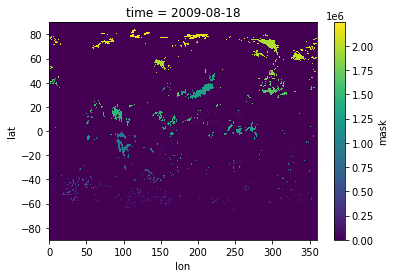

In [13]:
m2.plot()

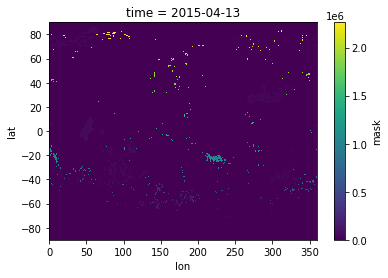

In [19]:
m1=mask.sel(time=['2015-4-13'])
m2=m1.mask
m2.plot()

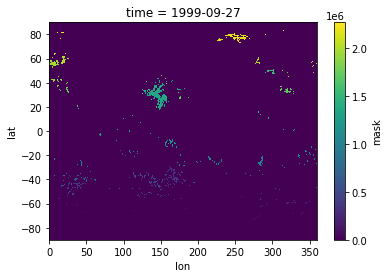

In [15]:
m1=mask.sel(time=['1999-9-27'])
m2=m1.mask
m2.plot()

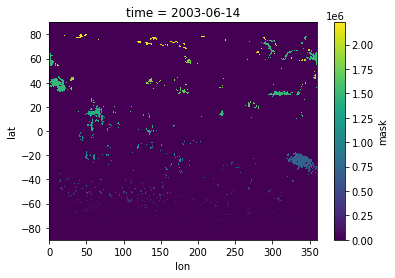

In [22]:
m1=mask.sel(time=['2003-6-14'])
m2=m1.mask
m2.plot()

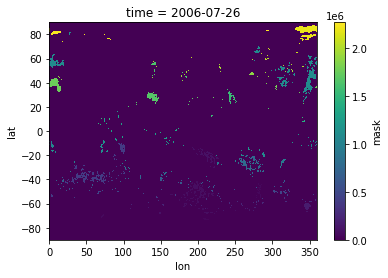

In [23]:
m1=mask.sel(time=['2006-7-26'])
m2=m1.mask
m2.plot()

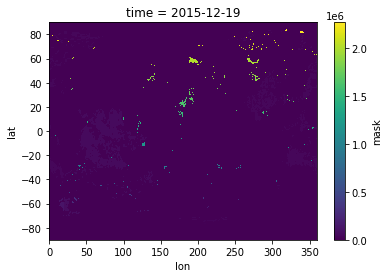

In [24]:
m1=mask.sel(time=['2015-12-19'])
m2=m1.mask
m2.plot()

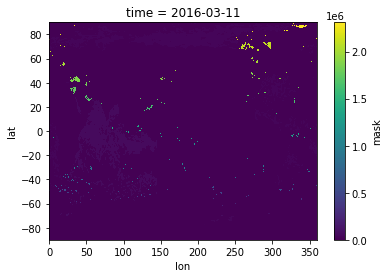

In [25]:
m1=mask.sel(time=['2016-3-11'])
m2=m1.mask
m2.plot()

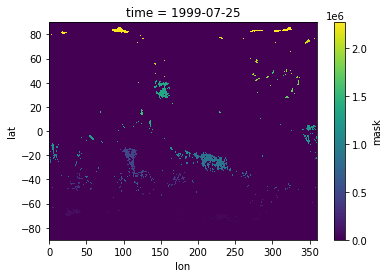

In [26]:
m1=mask.sel(time=['1999-7-25'])
m2=m1.mask
m2.plot()

m1=mask.sel(time='[)
m2=m1.mask
m2.plot()

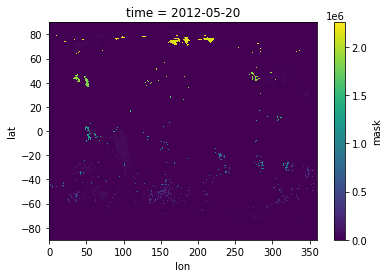

In [27]:
m1=mask.sel(time=['2012-5-20'])
m2=m1.mask
m2.plot()

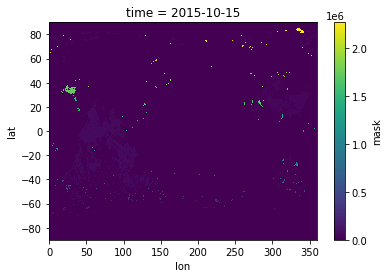

In [28]:
m1=mask.sel(time=['2015-10-15'])
m2=m1.mask
m2.plot()

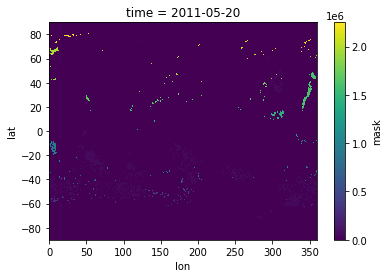

In [29]:
m1=mask.sel(time=['2011-5-20'])
m2=m1.mask
m2.plot()

In [10]:
sf=pandas.read_csv("MHWS_2019.csv")

In [11]:
sf

,Id,NVox,category,mask_Id,max_area,xcen,xboxmin,xboxmax,ycen,yboxmin,yboxmax,zcen,zboxmin,zboxmax,date,lat,lon
0,1,1134,1,1,45,46.798943,46,50,671.23724,663,681,102.87390,68,132,1982-04-13,-78.175264,167.934311
1,2,124281,4,2,1706,55.601765,46,77,750.45685,651,828,144.77340,1,427,1982-05-25,-75.974559,187.739212
2,3,29,2,7,3,46.000000,46,46,663.75860,663,665,366.89655,362,373,1983-01-02,-78.375000,166.064651
3,4,5505,1,8,227,50.672115,46,63,673.92554,651,706,476.77438,450,501,1983-04-22,-77.206971,168.606384
4,5,54,1,10,8,46.333332,46,47,664.88890,663,667,571.48150,568,575,1983-07-26,-78.291667,166.347229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649470,649471,12,1,2268291,2,718.000000,718,718,1429.50000,1429,1430,703.50000,701,706,1983-12-05,89.625000,357.500000
649471,649472,12,1,2268296,2,718.000000,718,718,1433.50000,1433,1434,703.50000,701,706,1983-12-05,89.625000,358.500000
649472,649473,6,1,2268298,1,718.000000,718,718,1435.00000,1435,1435,12499.50000,12497,12502,2016-03-22,89.625000,358.875000
649473,649474,6,1,2268300,1,718.000000,718,718,1436.00000,1436,1436,13136.50000,13134,13139,2017-12-19,89.625000,359.125000


In [12]:
def load_systems(mhw_sys_file, vary=False):
    """
    Load up the MHW Systems into a pandas table

    Args:
        mhw_sys_file:
        vary (bool, optional):
            If True, load up the MHW Systems with varying climate threshold

    Returns:
        pandas.DataFrame:

    """

    
    # Read
    print("Loading systems from {}".format(mhw_sys_file))
    mhw_sys = pandas.read_csv(mhw_sys_file)
    # Add duration
    mhw_sys['duration'] = pandas.TimedeltaIndex(mhw_sys.zboxmax - mhw_sys.zboxmin + 1, unit='D')
    # Add datetime (based on zcen!)
    mhw_sys['datetime'] = [datetime.datetime.strptime(idate, '%Y-%m-%d') for idate in mhw_sys['date'].values]
    # Add start/end date
    mhw_sys['startdate'] = mhw_sys.datetime - pandas.TimedeltaIndex(mhw_sys.zcen-mhw_sys.zboxmin, unit='D')
    mhw_sys['enddate'] = mhw_sys.startdate + mhw_sys.duration

    print("Done")
    # Return
    return mhw_sys

In [13]:
sf=pandas.read_csv("MHWS_2019.csv")

In [14]:
sf.head()

,Id,NVox,category,mask_Id,max_area,xcen,xboxmin,xboxmax,ycen,yboxmin,yboxmax,zcen,zboxmin,zboxmax,date,lat,lon
0,1,1134,1,1,45,46.798943,46,50,671.23724,663,681,102.87390,68,132,1982-04-13,-78.175264,167.934311
1,2,124281,4,2,1706,55.601765,46,77,750.45685,651,828,144.77340,1,427,1982-05-25,-75.974559,187.739212
2,3,29,2,7,3,46.000000,46,46,663.75860,663,665,366.89655,362,373,1983-01-02,-78.375000,166.064651
3,4,5505,1,8,227,50.672115,46,63,673.92554,651,706,476.77438,450,501,1983-04-22,-77.206971,168.606384
4,5,54,1,10,8,46.333332,46,47,664.88890,663,667,571.48150,568,575,1983-07-26,-78.291667,166.347229


In [15]:
sf1=load_systems('MHWS_2019.csv',vary=True)

Loading systems from MHWS_2019.csv
Done


In [16]:
sf1

,Id,NVox,category,mask_Id,max_area,xcen,xboxmin,xboxmax,ycen,yboxmin,...,zcen,zboxmin,zboxmax,date,lat,lon,duration,datetime,startdate,enddate
0,1,1134,1,1,45,46.798943,46,50,671.23724,663,...,102.87390,68,132,1982-04-13,-78.175264,167.934311,65 days,1982-04-13,1982-03-09 03:01:35.040,1982-05-13 03:01:35.040
1,2,124281,4,2,1706,55.601765,46,77,750.45685,651,...,144.77340,1,427,1982-05-25,-75.974559,187.739212,427 days,1982-05-25,1982-01-01 05:26:18.240,1983-03-04 05:26:18.240
2,3,29,2,7,3,46.000000,46,46,663.75860,663,...,366.89655,362,373,1983-01-02,-78.375000,166.064651,12 days,1983-01-02,1982-12-28 02:28:58.080,1983-01-09 02:28:58.080
3,4,5505,1,8,227,50.672115,46,63,673.92554,651,...,476.77438,450,501,1983-04-22,-77.206971,168.606384,52 days,1983-04-22,1983-03-26 05:24:53.568,1983-05-17 05:24:53.568
4,5,54,1,10,8,46.333332,46,47,664.88890,663,...,571.48150,568,575,1983-07-26,-78.291667,166.347229,8 days,1983-07-26,1983-07-22 12:26:38.400,1983-07-30 12:26:38.400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649470,649471,12,1,2268291,2,718.000000,718,718,1429.50000,1429,...,703.50000,701,706,1983-12-05,89.625000,357.500000,6 days,1983-12-05,1983-12-02 12:00:00.000,1983-12-08 12:00:00.000
649471,649472,12,1,2268296,2,718.000000,718,718,1433.50000,1433,...,703.50000,701,706,1983-12-05,89.625000,358.500000,6 days,1983-12-05,1983-12-02 12:00:00.000,1983-12-08 12:00:00.000
649472,649473,6,1,2268298,1,718.000000,718,718,1435.00000,1435,...,12499.50000,12497,12502,2016-03-22,89.625000,358.875000,6 days,2016-03-22,2016-03-19 12:00:00.000,2016-03-25 12:00:00.000
649473,649474,6,1,2268300,1,718.000000,718,718,1436.00000,1436,...,13136.50000,13134,13139,2017-12-19,89.625000,359.125000,6 days,2017-12-19,2017-12-16 12:00:00.000,2017-12-22 12:00:00.000


In [17]:
sf1.datetime

0        1982-04-13
1        1982-05-25
2        1983-01-02
3        1983-04-22
4        1983-07-26
            ...    
649470   1983-12-05
649471   1983-12-05
649472   2016-03-22
649473   2017-12-19
649474   1983-12-05
Name: datetime, Length: 649475, dtype: datetime64[ns]

In [18]:
sf1.duration

0         65 days
1        427 days
2         12 days
3         52 days
4          8 days
           ...   
649470     6 days
649471     6 days
649472     6 days
649473     6 days
649474     6 days
Name: duration, Length: 649475, dtype: timedelta64[ns]

In [19]:
srt=np.argsort(sf1.duration)
srt

0         549945
1         545130
2         271023
3         154385
4         416257
           ...  
649470     12886
649471      1609
649472      8513
649473       252
649474     13506
Name: duration, Length: 649475, dtype: int64

In [55]:
extreme_mhws=sf1.iloc[srt[-50:]]
extreme_mhws[['NVox', 'duration', 'lat', 'lon','startdate','enddate','mask_Id']]

,NVox,duration,lat,lon,startdate,enddate,mask_Id
15352,859380,502 days,-58.782114,64.057297,1982-04-18 07:57:27.648000000,1983-09-02 07:57:27.648000000,70074
161128,2349797,503 days,-28.111115,174.334183,1997-10-05 07:29:16.800000001,1999-02-20 07:29:16.800000001,580644
1768,312021,504 days,-71.816927,322.847839,1984-01-12 09:54:56.160000000,1985-05-30 09:54:56.160000000,5893
611420,26289,520 days,73.863876,240.347244,2013-03-18 06:56:09.600000000,2014-08-20 06:56:09.600000000,2084464
22948,733824,525 days,-56.723663,98.298309,2008-07-25 11:15:21.600000000,2010-01-01 11:15:21.600000000,106799
11994,1099023,540 days,-59.753063,246.875504,2006-04-29 20:48:28.800000000,2007-10-21 20:48:28.800000000,52872
442012,1072378,547 days,41.449448,327.642883,1998-04-15 03:05:45.600000000,1999-10-14 03:05:45.600000000,1534061
90548,3301610,547 days,-15.007484,87.260551,1997-07-03 21:22:27.840000000,1999-01-01 21:22:27.840000000,356498
2682,986014,548 days,-59.527792,330.272888,1996-01-02 07:34:10.560000000,1997-07-03 07:34:10.560000000,10290
451279,1548488,558 days,44.402786,210.200195,2004-04-02 00:11:31.200000000,2005-10-12 00:11:31.200000000,1560702


In [50]:
sf1.keys()

Index(['Id', 'NVox', 'category', 'mask_Id', 'max_area', 'xcen', 'xboxmin',
       'xboxmax', 'ycen', 'yboxmin', 'yboxmax', 'zcen', 'zboxmin', 'zboxmax',
       'date', 'lat', 'lon', 'duration', 'datetime', 'startdate', 'enddate'],
      dtype='object')